## objective:
- Explore the oco anomalies data from world bank
- visualize the data and create animation `.mp4`

## Data source:
- To download the file: 
- CTRL + click: 
https://datacatalogfiles.worldbank.org/ddh-published/0062760/DR0091586/Global%20XCO2%20Anomalies%20and%20Means%20to%20Dec%202021.csv?versionId=2023-06-06T17:40:50.4753444Z

### Research Paper Description on OCO2 anomalies: 

<b>Abstract</b>
https://acp.copernicus.org/preprints/acp-2018-649/acp-2018-649.pdf

<p>We see, for example, that positive anomalies correspond to fossil fuel combustion over the major industrial areas (e.g., China, eastern USA, central Europe, India, and the Highveld region in South Africa), shown as large positive XCO2 enhancements in the model simulations. Also, we find corresponding positive anomalies and fluxes over biomass burning areas during different fire seasons. On the other hand, the largest negative anomalies correspond to the growing season in the northern middle latitudes, characterized by negative XCO2 enhancements from simulations and high SIF values (indicating the occurrence of photosynthesis). Finally, we show how XCO2 anomalies facilitate the detection of anthropogenic signatures for several local scale case studies, both in the Northern and Southern Hemisphere.
</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio
import os
import natsort ## to sort the files

In [4]:
# for visualization 
import matplotlib.pyplot as plt # to create plots and graphs
from mpl_toolkits.basemap import Basemap
from moviepy.editor import VideoFileClip, clips_array, concatenate_videoclips
from moviepy.editor import *

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
%%time
df= pd.read_csv("../../../Cluster_machine/Global XCO2 Anomalies and Means to Dec 2021.csv")

Wall time: 1.13 s


In [7]:
df.shape

(2089692, 7)

In [8]:
df.head(15)

,ngfed_id,x,y,year,month,mean_xco2,mean_xco2_anomaly
0,241702,-179.875,-19.125,2020,4,411.570584,1.418393
1,241702,-179.875,-19.125,2020,6,411.295512,0.036626
2,241702,-179.875,-19.125,2021,1,412.019338,0.004017
3,241702,-179.875,-19.125,2020,5,411.227090,0.623775
4,241702,-179.875,-19.125,2020,7,411.735586,0.515591
5,241702,-179.875,-19.125,2018,3,406.105332,1.018552
6,241702,-179.875,-19.125,2017,3,402.763838,0.212231
7,241702,-179.875,-19.125,2015,3,397.748160,0.885201
8,241702,-179.875,-19.125,2015,6,399.162686,0.650354
9,241702,-179.875,-19.125,2018,6,405.470412,-0.720020


In [9]:
df['year'].unique()

array([2020, 2021, 2018, 2017, 2015, 2019, 2016, 2014], dtype=int64)

## Sorting the file order by year and Month

In [10]:
df_oco= df.sort_values(by=["year","month"])
df_oco

,ngfed_id,x,y,year,month,mean_xco2,mean_xco2_anomaly
61,236794,-179.875,-15.875,2014,9,397.378316,1.130398
76,236429,-179.875,-15.625,2014,9,397.171053,0.923134
167,239871,-179.375,-17.875,2014,9,394.890094,-1.174814
169,239489,-179.375,-17.625,2014,9,396.470652,0.405744
306,240979,-179.125,-18.625,2014,9,395.625298,-0.348105
...,...,...,...,...,...,...,...
2088627,263594,178.125,-38.625,2021,12,413.802696,0.184948
2088642,263498,178.125,-38.375,2021,12,413.327940,-0.297753
2088652,263392,178.125,-38.125,2021,12,413.585540,-0.040153
2088670,263282,178.125,-37.875,2021,12,412.888336,-0.737357


## 2015

In [11]:
df_2015= df_oco[df_oco["year"] == 2015]
len(df_2015)

283868

In [12]:
df_oco.head(15)

,ngfed_id,x,y,year,month,mean_xco2,mean_xco2_anomaly
61,236794,-179.875,-15.875,2014,9,397.378316,1.130398
76,236429,-179.875,-15.625,2014,9,397.171053,0.923134
167,239871,-179.375,-17.875,2014,9,394.890094,-1.174814
169,239489,-179.375,-17.625,2014,9,396.470652,0.405744
306,240979,-179.125,-18.625,2014,9,395.625298,-0.348105
315,240247,-179.125,-18.125,2014,9,395.307024,-0.757883
338,239872,-179.125,-17.875,2014,9,396.105173,0.040265
455,241342,-178.875,-18.875,2014,9,395.287287,-0.686115
574,32659,-178.625,67.875,2014,9,394.745453,1.402911
639,33790,-178.375,67.625,2014,9,393.311035,-0.031506


In [13]:
df_2015= df_oco[df_oco['year'] == 2015]

df_2015["Index"]= list(np.arange(0, len(df_2015)))
df_2015.to_csv("xco2_anomalies_2015.csv", index= False)

In [14]:
df_2014= df_oco[df_oco['year'] == 2014]
df_2014["Index"]= list(np.arange(0, len(df_2014)))
df_2014.to_csv("xco2_anomalies_2014.csv", index= False)

In [15]:
df_2014.head(3)

,ngfed_id,x,y,year,month,mean_xco2,mean_xco2_anomaly,Index
61,236794,-179.875,-15.875,2014,9,397.378316,1.130398,0
76,236429,-179.875,-15.625,2014,9,397.171053,0.923134,1
167,239871,-179.375,-17.875,2014,9,394.890094,-1.174814,2


In [16]:
!mkdir frames

## Example:

In [17]:
# first_1= df_2015[df_2015['month'] == 2]
# map_by_month(first_1, 2015, 2, 1, "total/")

## Get MONTHS by number and alpha

In [18]:
months_= np.arange(1, 13)
months_alp= ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

months_, len(months_)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 12)

## PATH

In [19]:
# path_= '../DATA_2016_2020_csv__and_OCO2_overPASS/SMAP_cali_jpeg/spring_feb_2020/'
path_= 'frames/'

## 2. Re-arrange the filenames to create animation
- arranging by ALPHA numerical order
- using the library `natsorted`

## Combined func

In [20]:
df_oco['year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

## 3. Collect files ending with `.jpeg` format

In [21]:
def get_file_names(path_):
    # Collect the paths of each individual files
    file_names= []

    for file in os.listdir(path_):
        # Check whether file is in text format or not

        #### PNG
        if file.endswith(".jpeg"):

            file_path = f"{path_}/{file}"
            # Store the path location of each individual files
            file_names.append(file_path)

    return file_names

## 4. Create Map for every YEAR by Diff. Month
- Iterate over the diff. dataframes
- Using the above function to create individual map for DIFF. Year and MONTH

### NOTE:
- Adjusting the figure size (15, 12) to able to generate MAP image
- Save the map in dir.m
- Adjust the color bar range

In [22]:
# create a function that creates a BASEMAP
def map_by_month_of_year(data, year, month, file_num,  x="Longitude",y= "Latitude", lon_min= -180, lon_max= 180, lat_min= -90, lat_max= 90, size_point= 5, frontier= False):
     
    # Figure setting    
    plt.figure(figsize= (15, 12), edgecolor='b')
    
    #PROJECTION 'cyl' -> Equilateral Diagram
    m= Basemap(projection='cyl', 
               #resolution='c',
               resolution= 'l',
               llcrnrlat= lat_min, urcrnrlat=lat_max, llcrnrlon= lon_min, urcrnrlon= lon_max)

    m.scatter( data['x'], data['y'], c= data['mean_xco2_anomaly'], cmap= plt.cm.coolwarm, s=10, #norm= normal,
             marker='d')
    
    # Customizing the COLORBAR
    cbar= plt.colorbar(orientation= "horizontal",
                      format= "%.0f",
                      extend="both",
                      shrink= 0.25,
                      aspect= 12,
                      pad= 0.05)
    
    cbar.set_label(label="Mean_xco2_anomaly", size= 16)
    cbar.ax.tick_params(labelsize= 12)

    # ADJUSTT the CBAR by year
    cbar.set_ticks(np.linspace(-6 , 6, 6), size= 7)
    plt.clim(-6 , 6)
    

    # BORDER Lining
    m.drawmapboundary(fill_color='white')
    m.drawcoastlines()
    m.drawparallels(range(-90, 90, 30), labels=[1, 1, 1, 1],textcolor='black')
    m.drawmeridians(range(-180, 180, 30), labels= [1, 0, 0, 1], textcolor= 'black')
    
    plt.grid()
    plt.title('Atmospheric XCO2 Anomalies\n'+str(year)+' - '+str(month), fontsize = 20)
    
    # Saving the Graph into specified Directory

    dir_= 'year_' + str(year)
    plt.savefig("frames/" + str(dir_) + "/" + str(file_num) + "_" + str(month)+"_"+".jpeg",
               dpi= 350)



## Func: to generate images from BASEMAP by diff. YEARS and MONTHS

In [23]:
# map_by_month()
def total_by_months(df, year):
    
    ## months conv numerical
    months_= np.arange(1, 13)
    months_alp= ['Jan', 'Feb', 'March', 'April', 'May',
            'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

    # select by year
    new_df= df[df['year'] == year]
    
    # get the months; 2014 year starts from Sept month
    tot_months= natsort.natsorted( new_df['month'][new_df['year'] == year ].unique())
    
    for month in tot_months:
        file_num= month
        map_by_month_of_year(new_df[new_df['month'] == month], year, months_alp[month - 1], file_num )


### Example; graph plot

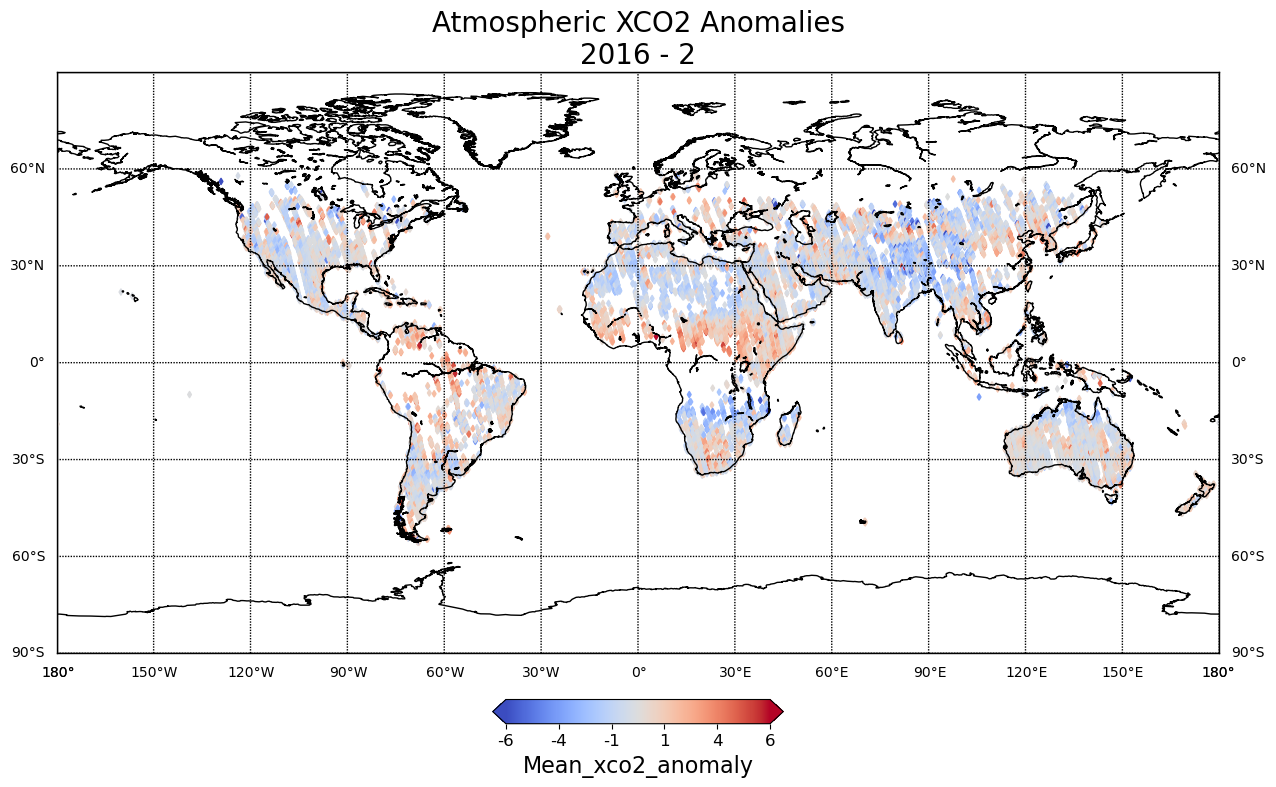

In [28]:
## example
first_ = df_oco[df_oco["year"] == 2016]
first_example= first_[first_["month"] == 2]

map_by_month_of_year(first_example, 2016, 2, 'Feb')

## FINAL: combined func. 
1. to generate image
2. use combined images to generate mp4 files
3. display video

## Make dir. by different years

A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.
A subdirectory or file -f already exists.
Error occurred while processing: -f.


## Generate FRAMES by every year

In [54]:
def get_df(df):
    
    ## 1. Get the total years from the dataset
    tot_years= natsort.natsorted(df['year'].unique())
    
    ## 2. Generate images by diff. years, and Using the YEAR as `DIR.` folders for seperate year
    ## call the function `total_by_months`
    for yr in range(0, len(tot_years)):
        total_by_months(df, tot_years[yr])

#     for yr in range(0, len(tot_years)):
#         ## 3. REARRANGE the order of filenames by diff. YEAR
#         path_= "frames/year_" + str(tot_years[yr]) ## create a PATH to specify diff. year
#         file_names= natsort.natsorted( get_file_names(path_))

#         ### 4. Create MP4 by SPECIFIED year from VIDEO clips
#         writer = imageio.get_writer('video_clips/'+str(tot_years[yr])+'_xco2_anomalies.mp4', fps= 0.5)

#         for im in file_names:
#             writer.append_data(imageio.imread(im))
#         writer.close()


### Frames generated:
* Function below generate frames of graph plots which will be used for creating a video file

In [2]:
# %%time
get_df(df)

## Create Individual Animation
- By combining the jpeg files

In [56]:
tot_years= natsort.natsorted(df['year'].unique())

path_= "frames/year_" + str(tot_years[4])
file_names= natsort.natsorted( get_file_names(path_))

file_names

['frames/year_2018/1_Jan_.jpeg',
 'frames/year_2018/2_Feb_.jpeg',
 'frames/year_2018/3_March_.jpeg',
 'frames/year_2018/4_April_.jpeg',
 'frames/year_2018/5_May_.jpeg',
 'frames/year_2018/6_June_.jpeg',
 'frames/year_2018/7_July_.jpeg',
 'frames/year_2018/8_Aug_.jpeg',
 'frames/year_2018/9_Sept_.jpeg',
 'frames/year_2018/10_Oct_.jpeg',
 'frames/year_2018/11_Nov_.jpeg',
 'frames/year_2018/12_Dec_.jpeg']

In [57]:
def create_vid(df):
    tot_years= natsort.natsorted(df['year'].unique())

    for yr in range(0, len(tot_years)):
        ## 3. REARRANGE the order of filenames by diff. YEAR
        path_= "frames/year_" + str(tot_years[yr]) ## create a PATH to specify diff. year
        file_names= natsort.natsorted( get_file_names(path_))

        ### 4. Create MP4 by SPECIFIED year from VIDEO clips
        writer = imageio.get_writer('video_clips/'+str(tot_years[yr])+'_xco2_anomalies.mp4', fps= 0.5)

        for im in file_names:
            writer.append_data(imageio.imread(im))
        writer.close()


## Create Animation for EVERY year and month

In [58]:
create_vid(df)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (5250, 4200) to (5264, 4208) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (5250, 4200) to (5264, 4208) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (5250, 4200) to (5264, 4208) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNIN

## Total Years

In [59]:
tot_years_list= df_oco['year'].unique()
tot_years_list= [str("year_") + str(i) for i in tot_years_list]

tot_years_list

['year_2014',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021']

## Generate multiple FILES of graphs videos in a dir.

In [61]:
video_clip_paths= "video_clips/"

mp4_files= [str(video_clip_paths)+ str(f) for f in os.listdir(video_clip_paths) if f.endswith(".mp4")]
clips= [VideoFileClip(c) for c in mp4_files]
clips

## Example: SINGLE file display

In [65]:
# a= VideoFileClip("video_clips/2014_xco2_anomalies.mp4")
# a.subclip(0,5)

# a.ipython_display(width= 900, autoplay= True)

## SAVE the final clip (By merging multiple years of files)
- concatenate with `clips` list above

In [63]:
final_clip = concatenate_videoclips(clips, method='compose')
final_clip.write_videofile('final_merged_xco2_anomalies.mp4')

Moviepy - Building video final_merged_xco2_anomalies.mp4.
Moviepy - Writing video final_merged_xco2_anomalies.mp4



Moviepy - Done !
Moviepy - video ready final_merged_xco2_anomalies.mp4


In [1]:
# final_merged= VideoFileClip("final_merged_xco2_anomalies.mp4")
# ipython_display(final_merged, width= 900, autoplay= True, maxduration= 240)

In [ ]:
final_merged= VideoFileClip("final_merged_xco2_anomalies.mp4")
ipython_display(final_merged, width= 900, autoplay= True, maxduration= 240)

## Generate parquet files to visualize in D3

In [85]:
%%time
new_df= df_oco[(df_oco['year'] > 2018)]
new_df_a= df_oco[(df_oco['year'] <= 2018)]

new_df.to_parquet("xco2_anomalies_2019_2021.parquet", engine="fastparquet")
new_df_a.to_parquet("xco2_anomalies_2014_2018.parquet", engine="fastparquet")

Wall time: 522 ms


In [97]:
# new_df_a.to_json("xco2_anomalies_2014_2018.json")

In [92]:
new_df_a.head(3)

,ngfed_id,x,y,year,month,mean_xco2,mean_xco2_anomaly
61,236794,-179.875,-15.875,2014,9,397.378316,1.130398
76,236429,-179.875,-15.625,2014,9,397.171053,0.923134
167,239871,-179.375,-17.875,2014,9,394.890094,-1.174814


In [94]:
np.array(new_df['x'][:5]), np.array(new_df['y'][:5]),  np.array(new_df['mean_xco2_anomaly'][:5]) ,  np.array(new_df['year'][:5]) 

(array([-179.875, -179.375, -179.375, -175.125, -157.375]),
 array([-15.625, -16.375, -15.875, -21.125,  21.125]),
 array([-0.70241702,  0.40272152, -0.74727201,  1.2615852 ,  1.3584321 ]),
 array([2019, 2019, 2019, 2019, 2019], dtype=int64))

In [69]:
df_a= pd.DataFrame()
df_a['time'] = pd.date_range('08/12/2021',
                             periods=6, freq='1D')

In [70]:
df_a

,time
0,2021-08-12
1,2021-08-13
2,2021-08-14
3,2021-08-15
4,2021-08-16
5,2021-08-17
